<a href="https://colab.research.google.com/github/w217423151/Midterm-ITAI-1371-Group-4/blob/w217423151-patch-1/midterm_group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Perform a cleanup on it using the guidelines you learnt
# COMPLETED PIPELINE SUMMARY
# ------------------------------
# 1. Data loading & exploration
# 2. Removed unnecessary and constant columns
#    *** Separate Target variable from the dataset
# 3  *** Feature engineering (outliers, binning, domain features)
# 4  *** Filling Nan and Null values with appropriate values - Handled missing values
# 5  *** One-hot encoding - Encoded categorical features / Encoding: Converting categorical txt to numbers
#    *** Encoding the Target Variable
# 6. *** Scaling Stardarizing : Changing the range of your data - Scaled and normalized data
#    *** Scaling Normalization: Adjusting the shape of your data's distribution
# 7. Correlation-based feature reduction with visualization
# 8. Train-test split
# 9. Random Forest model training
# 10 Performance evaluation and ROC
# 11 Income Distribution – Target Variable Analysis
# 12 *** predication whether a person will be making more than $50k.

# Perform a cleanup on it using the guidelines you learnt .

# Also discuss and write a paper with all the techniques you implemented.
# Build a Jupyter notebook to show the dataset before and after cleanup.
# Also discuss how you would use this dataset to solve a ML problem.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np


In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# 01 - Data loading & exploration
# To upload the file, go to the "Files" tab on the left sidebar, click on the upload icon, and select your 'adult.csv' file.
# After uploading, you can get the file path by hovering over the file name, clicking the three dots, and selecting "Copy path".
# Then, replace the placeholder below with the copied path.
df = pd.read_csv("/content/adult.csv") # Replace "" with the path to your uploaded 'adult.csv' file

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### 1. Data loading & exploration

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#cleaning no 1
df = df[df['native.country'] == 'United-States']
print(f"Dataset filtered to US only: {df.shape[0]} rows")

Dataset filtered to US only: 29170 rows


In [ ]:
df[df['native.country'] == 'United-States']['capital.gain'].value_counts()

,count
capital.gain,
0,26699
15024,320
7688,261
7298,228
99999,142
...,...
2538,1
2062,1
1455,1


In [ ]:
df.shape

(29170, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29170 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   workclass       29170 non-null  object
 2   fnlwgt          29170 non-null  int64 
 3   education       29170 non-null  object
 4   education.num   29170 non-null  int64 
 5   marital.status  29170 non-null  object
 6   occupation      29170 non-null  object
 7   relationship    29170 non-null  object
 8   race            29170 non-null  object
 9   sex             29170 non-null  object
 10  capital.gain    29170 non-null  int64 
 11  capital.loss    29170 non-null  int64 
 12  hours.per.week  29170 non-null  int64 
 13  native.country  29170 non-null  object
 14  income          29170 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


In [ ]:
# isnull used to check if we have any null value in the dataset
df.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# cleaning no 2
# inplace = True states that there is no re-assignment of the variable df.
# Here whatever change we made, that we are keeping it in df itself

df.replace("?",np.nan, inplace = True)


# df1 = df.replace("?",np.nan) Comment: Here we are create a copy of df which is df1
# and we are keeping the changes in the new copied df1

/tmp/ipython-input-576745082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?",np.nan, inplace = True)


In [ ]:
# Here we converted "?" to Null (np.nan)

df.isnull().sum()

,0
age,0
workclass,1659
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1666
relationship,0
race,0
sex,0


### Correcting marital-status values

In [ ]:
# cleaning no 3
df['marital.status'] = df['marital.status'].replace({'Married-spouse-absent': 'Not-married'})

/tmp/ipython-input-2054269283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital.status'] = df['marital.status'].replace({'Married-spouse-absent': 'Not-married'})


In [ ]:
df[df['marital.status'] == 'Not-married']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
45,48,Private,121253,Bachelors,13,Not-married,Sales,Unmarried,White,Female,0,2472,70,United-States,>50K
328,31,Self-emp-not-inc,161745,Bachelors,13,Not-married,Exec-managerial,Not-in-family,White,Male,0,1980,60,United-States,<=50K
1098,39,Self-emp-not-inc,251710,10th,6,Not-married,Other-service,Not-in-family,White,Female,0,1721,15,United-States,<=50K
1108,22,Private,347867,HS-grad,9,Not-married,Sales,Not-in-family,White,Male,0,1719,40,United-States,<=50K
1225,19,Private,240468,Some-college,10,Not-married,Sales,Own-child,White,Female,0,1602,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32078,58,NaN,97969,1st-4th,2,Not-married,NaN,Unmarried,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32298,37,Private,249720,Assoc-voc,11,Not-married,Sales,Unmarried,Black,Female,0,0,32,United-States,<=50K
32367,34,Private,121966,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Female,0,0,45,United-States,<=50K
32374,60,Private,36077,7th-8th,4,Not-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Check constant columns (only one unique value)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

In [ ]:
constant_cols

['native.country']

#### 02 Removed unnecessary and constant columns

In [ ]:
# cleaning no 4
# 02 Removed unnecessary and constant columns
"""
Unnecessary columns can include:
1. Identifier-like columns (e.g., 'id', 'fnlwgt' if not useful)
2. Duplicate or constant-value columns
3. Columns with too many unique values relative to dataset size
4. Irrelevant for modeling (like names or timestamps)

We'll detect and remove such columns automatically.
"""

# Check constant columns (only one unique value)
# constant_cols = [col for col in df.columns if df[col].nunique() == 1]

# Check quasi-identifiers (e.g., 'fnlwgt' in Adult dataset)
# 'fnlwgt' is a census weight — not useful for prediction.
unnecessary_cols =   ['fnlwgt']

# Drop the unnecessary columns
df.drop(columns=unnecessary_cols, inplace=True, errors='ignore')

# print("Constant columns: ", constant_cols)
print(f"Dropped columns: {unnecessary_cols}")
print("Remaining columns:", df.columns.tolist())


Dropped columns: ['fnlwgt']
Remaining columns: ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


/tmp/ipython-input-2105872126.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=unnecessary_cols, inplace=True, errors='ignore')



--- Bar Plots for Categorical Variables ---


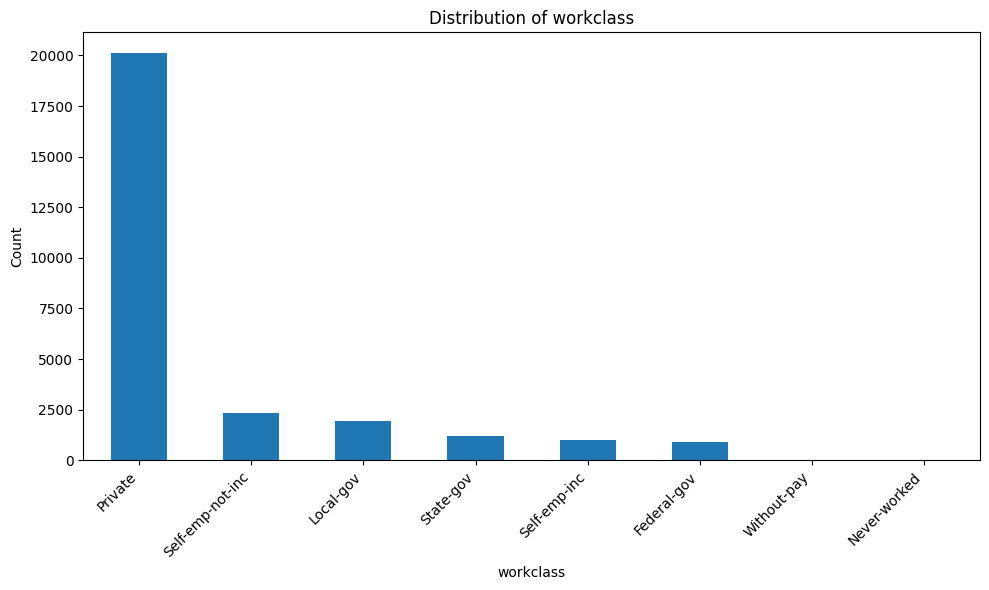

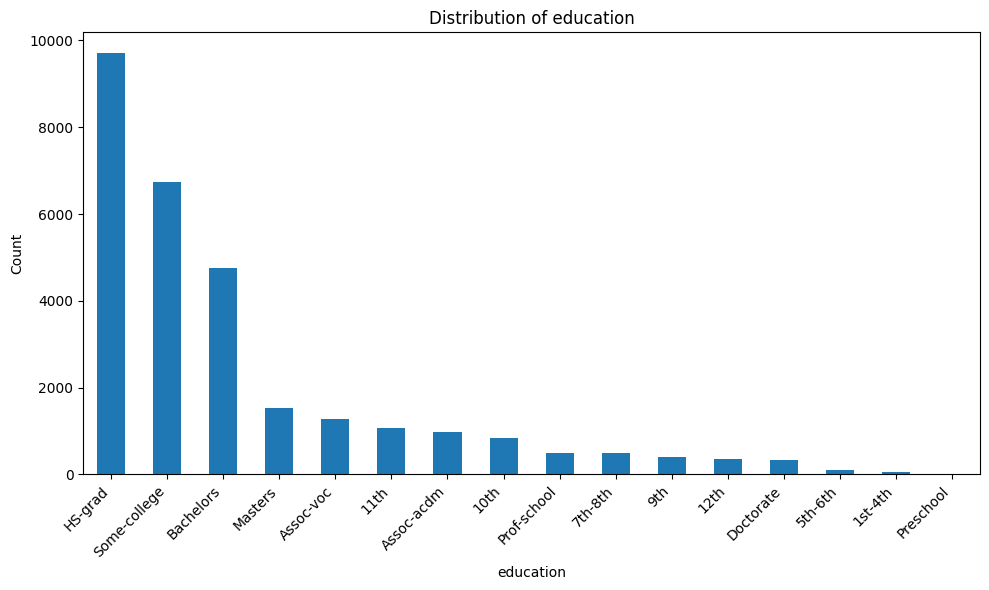

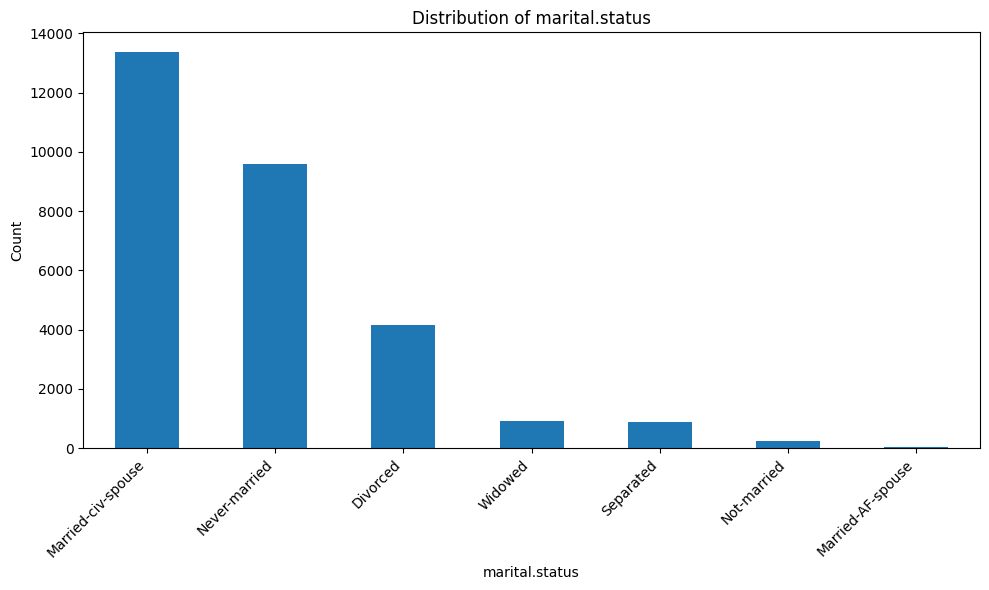

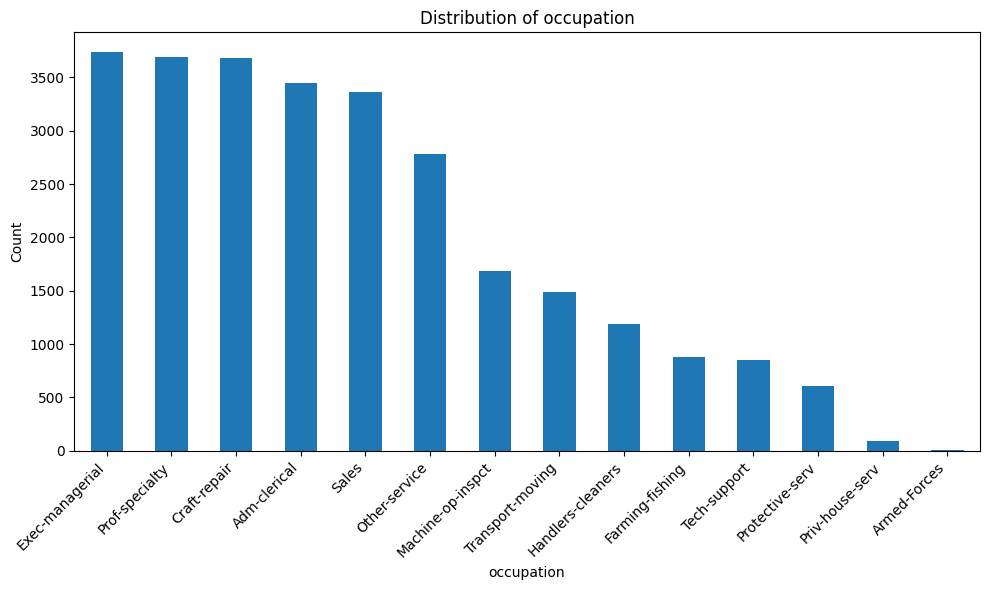

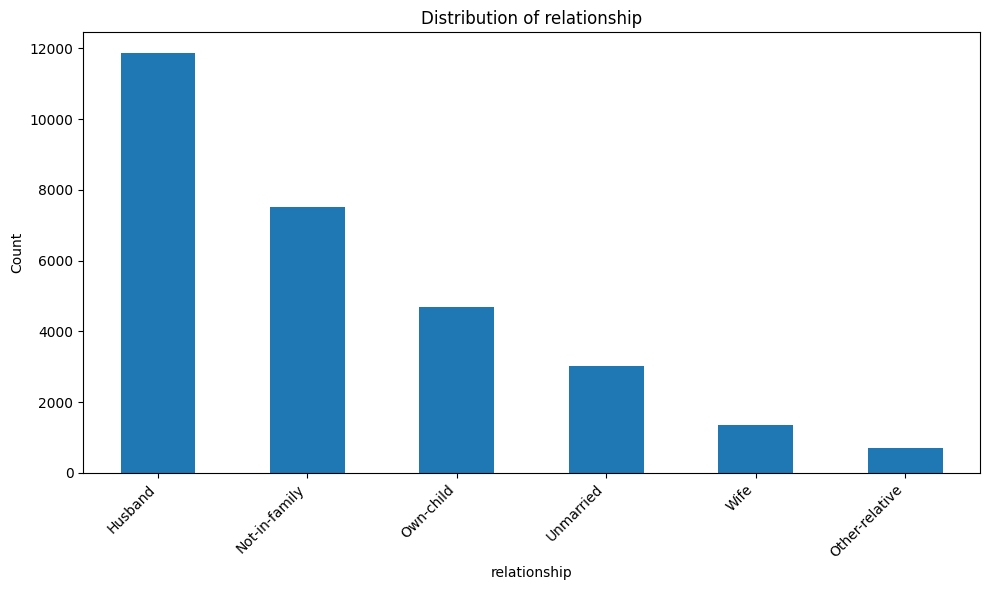

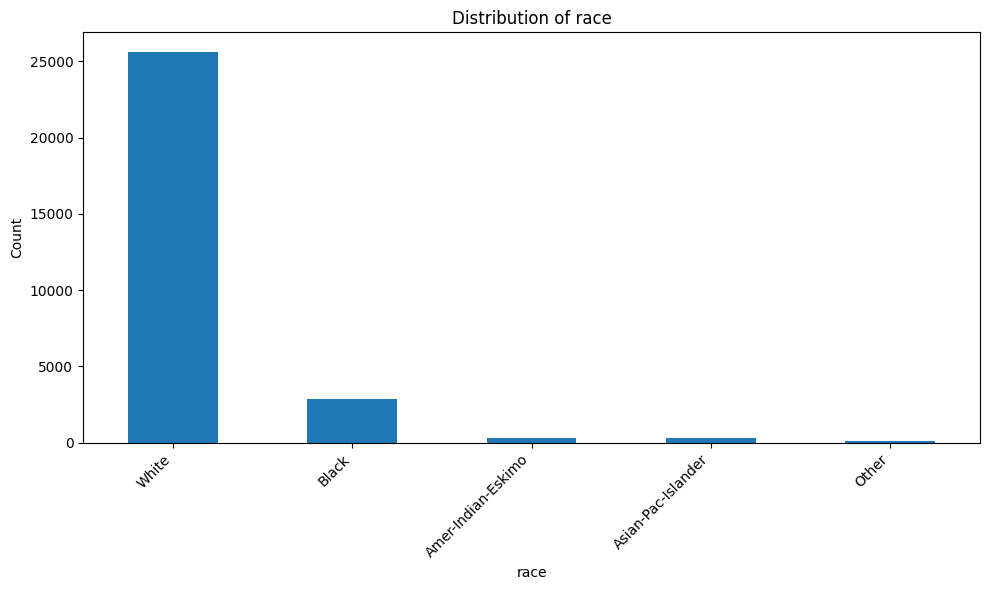

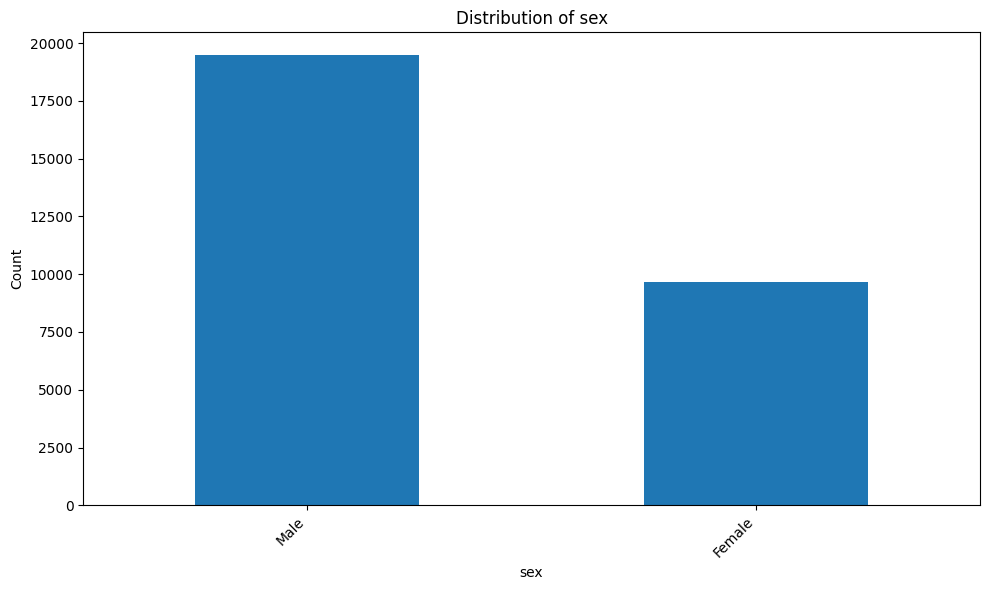

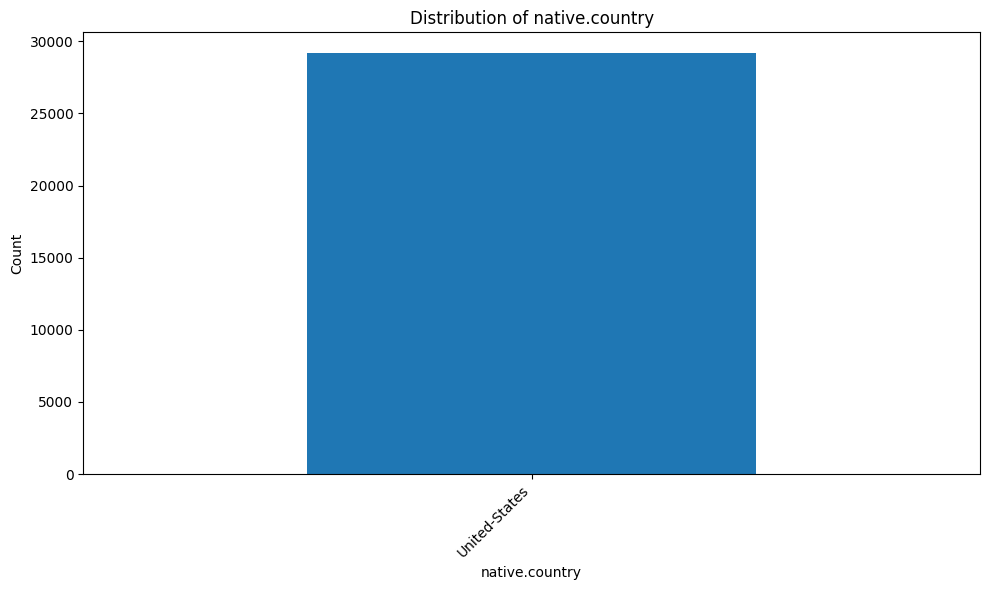

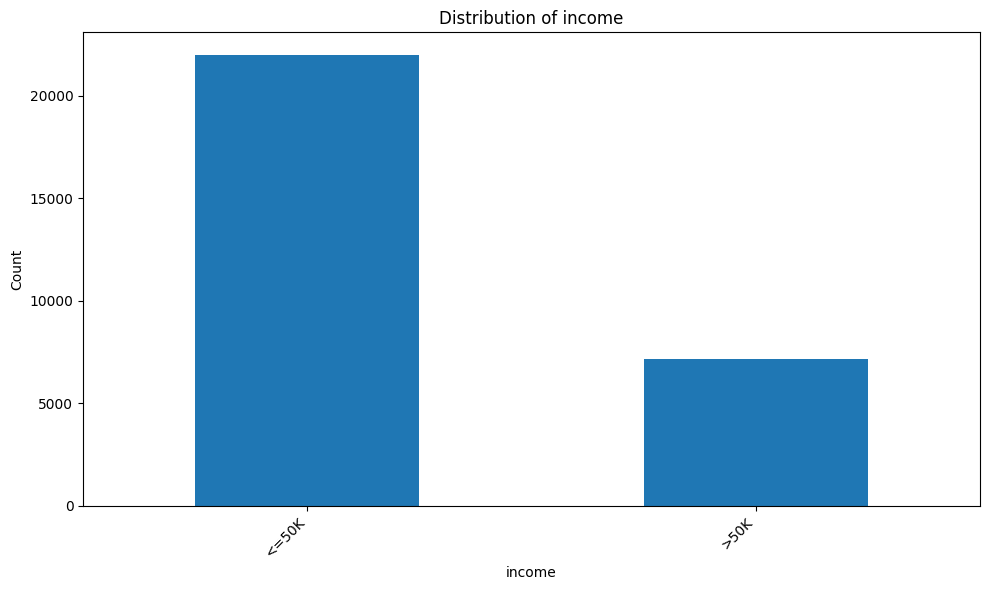

In [ ]:
# Bar plots for categorical variables
print("\n--- Bar Plots for Categorical Variables ---")
categorical_cols = df.select_dtypes(include='object').columns


for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- Box Plots for Numerical Variables ---


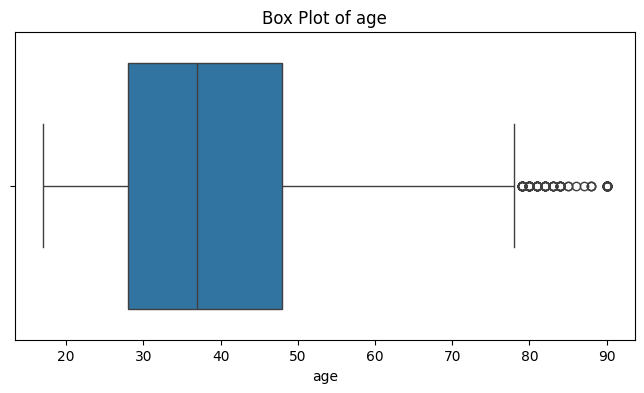

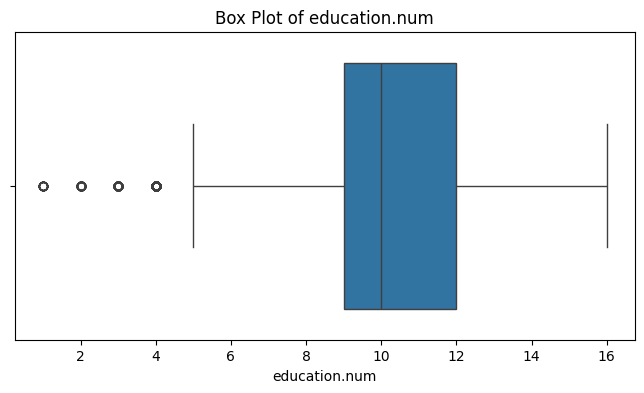

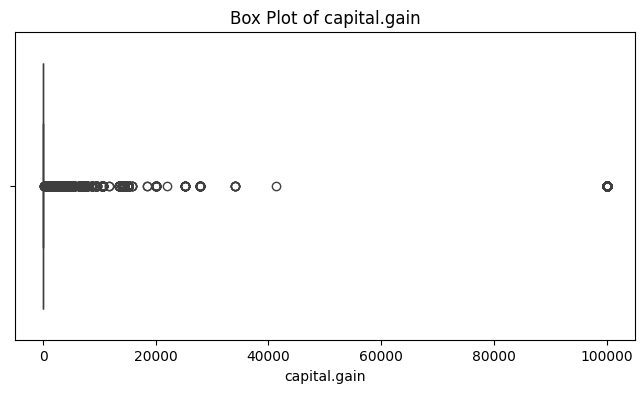

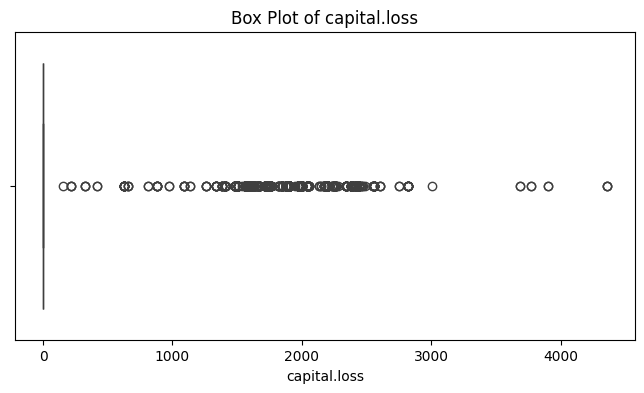

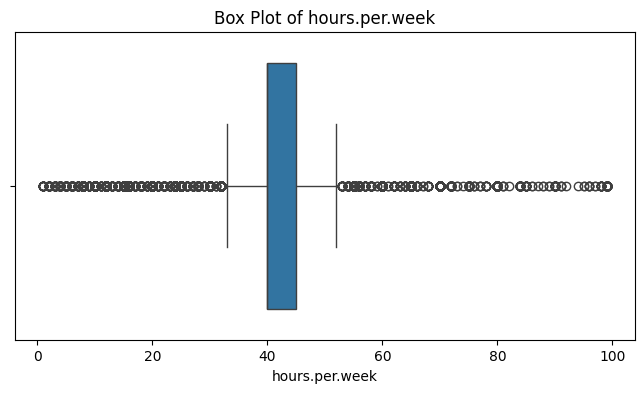

In [ ]:
# Box plots for numerical variables to identify outliers
print("\n--- Box Plots for Numerical Variables ---")
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [ ]:
# Cleaning no 5
# Separate Target Variable ( predict: income )

target_col = 'income'
X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (29170, 13)
Target shape: (29170,)


In [ ]:

X

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [ ]:
# the income column went to y because it is target column (which we are going to predict)
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,<=50K
32558,>50K
32559,<=50K


In [ ]:
X[X['native.country'] == 'United-States']['capital.gain'].value_counts()

,count
capital.gain,
0,26699
15024,320
7688,261
7298,228
99999,142
...,...
2538,1
2062,1
1455,1


### 03 Feature engineering

In [ ]:
# Data binning: We are putting people's age into several groups to make things simple,
# saved into new column age_bin
X['age_bin'] = pd.cut(
    X['age'],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
)


In [ ]:
X

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_bin
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,65+
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,65+
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,65+
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,45-55
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<25
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,25-35
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,35-45
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,55-65


In [ ]:

categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)

Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age_bin']

Numerical Columns: ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29170 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29170 non-null  int64   
 1   workclass       27511 non-null  object  
 2   education       29170 non-null  object  
 3   education.num   29170 non-null  int64   
 4   marital.status  29170 non-null  object  
 5   occupation      27504 non-null  object  
 6   relationship    29170 non-null  object  
 7   race            29170 non-null  object  
 8   sex             29170 non-null  object  
 9   capital.gain    29170 non-null  int64   
 10  capital.loss    29170 non-null  int64   
 11  hours.per.week  29170 non-null  int64   
 12  native.country  29170 non-null  object  
 13  age_bin         29170 non-null  category
dtypes: category(1), int64(5), object(8)
memory usage: 3.1+ MB


In [ ]:
# Removing outliers
# def remove_outliers_iqr(df, columns, factor=1.5):
#     for col in columns:
#         Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
#         df[col] = np.clip(df[col], lower, upper)
#     return df

# X_scaled_minmax = remove_outliers_iqr(X, numerical_cols)


In [ ]:
X[X['native.country'] == 'United-States']['capital.loss'].value_counts()

,count
capital.loss,
0,27791
1902,183
1977,153
1887,147
1848,48
...,...
1944,1
1411,1
1539,1


### Handling hours per week outliers

In [ ]:
max_possible_hours = 168 #24*7
X.loc[df['hours.per.week'] > max_possible_hours, 'hours.per.week'] = max_possible_hours

In [ ]:
X[X['hours.per.week']>168]

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_bin


### 4  *** Filling Nan and Null values with appropriate values - Handled missing values  


In [ ]:
# Strategy:
# - Categorical: Fill with mode (most frequent)
# - Numerical: Fill with median

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# Remove 'income' from categorical_cols as it's not in X
categorical_cols_for_imputation = [col for col in categorical_cols if col != 'income']

X[categorical_cols_for_imputation] = cat_imputer.fit_transform(X[categorical_cols_for_imputation])
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


print("Missing values after imputation:\n", X.isna().sum().sum())

Missing values after imputation:
 0


In [ ]:
X

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_bin
0,90.0,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,65+
1,82.0,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,65+
2,66.0,Private,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,65+
3,54.0,Private,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,45-55
4,41.0,Private,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,Private,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<25
32557,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,25-35
32558,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,35-45
32559,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,55-65


In [ ]:
X[X['native.country'] != 'United-States']

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_bin


In [ ]:
X.isna().sum()

,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


In [ ]:
X

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_bin
0,90.0,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,65+
1,82.0,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,65+
2,66.0,Private,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,65+
3,54.0,Private,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,45-55
4,41.0,Private,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,Private,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<25
32557,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,25-35
32558,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,35-45
32559,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,55-65


In [ ]:
X.shape

(29170, 14)

In [ ]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000
mean,38.655674,10.169455,1089.229928,88.510593,40.447755
std,13.722408,2.394966,7381.898528,405.681709,12.417203
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# df[df['native.country'] = '']


In [ ]:
X.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000
mean,38.655674,10.169455,1089.229928,88.510593,40.447755
std,13.722408,2.394966,7381.898528,405.681709,12.417203
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### # 5  One-hot encoding - Encoded categorical features

In [ ]:
# Encoded categorical features

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)


encoded_df = pd.DataFrame(
    encoder.fit_transform(X[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)


X = X.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)


X_encoded = pd.concat([X[numerical_cols], encoded_df], axis=1)

print("Shape after encoding:", X_encoded.shape)
X_encoded.head()

Shape after encoding: (29170, 61)


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25
0,90.0,9.0,0.0,4356.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,82.0,9.0,0.0,4356.0,18.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,66.0,10.0,0.0,4356.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,54.0,4.0,0.0,3900.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41.0,10.0,0.0,3900.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# # Either UNCOMMENT this cell or above (this cell is to drop "race", above one is to encode "race")
# # Encoded categorical features / Encoding: Converting categorical txt to numbers

# # One-hot encode categorical columns
# encoder = OneHotEncoder(drop='first', sparse_output=False)


# # Remove 'race' from categorical encoding (as per guideline)
# if 'race' in categorical_cols:
#     categorical_cols.remove('race')

# X.drop(columns = ['race'], inplace = True)

# encoded_df = pd.DataFrame(
#     encoder.fit_transform(X[categorical_cols]),
#     columns=encoder.get_feature_names_out(categorical_cols)
# )

# # Merge encoded columns with numerical features
# # X_encoded = pd.concat([X[numerical_cols], encoded_cols, axis=1)

# X = X.reset_index(drop=True)
# encoded_df = encoded_df.reset_index(drop=True)


# X_encoded = pd.concat([X[numerical_cols], encoded_df], axis=1)

# print("Shape after encoding:", X_encoded.shape)
# X_encoded.head()

In [ ]:
encoded_df.shape

(29170, 56)

In [ ]:
X[numerical_cols].shape

(29170, 5)

In [ ]:
X_encoded.shape

(29170, 61)

In [ ]:
X_encoded

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25
0,90.0,9.0,0.0,4356.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,82.0,9.0,0.0,4356.0,18.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,66.0,10.0,0.0,4356.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,54.0,4.0,0.0,3900.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41.0,10.0,0.0,3900.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,22.0,10.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
29166,27.0,12.0,0.0,0.0,38.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29167,40.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
29168,58.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Encoding the Target Variable
# Income: <=50K or >50K

y_encoded = LabelEncoder().fit_transform(y)

print("Encoded target values:", np.unique(y_encoded))

Encoded target values: [0 1]


### 6. Scaling Stardarizing : Changing the range of your data - Scaled and normalized data


In [ ]:
X_encoded['hours.per.week']

,hours.per.week
0,40.0
1,18.0
2,40.0
3,40.0
4,40.0
...,...
29165,40.0
29166,38.0
29167,40.0
29168,40.0


In [ ]:
# Scaling Standar
# Scaling: Change range (StandardScaler)
scaler_standard = StandardScaler()

# Do not scale hours-per-week
# Optionally scale other numeric columns if needed (excluding hours-per-week)
num_to_scale = [col for col in X_encoded.columns if col != 'hours.per.week']

# X_encoded.drop(columns = ['hours.per.week'], inplace = True)



# Standard Scaled version
X_scaled_standard = pd.DataFrame(
    scaler_standard.fit_transform(X_encoded[num_to_scale]),
    columns = num_to_scale)

X_scaled_standard['hours.per.week'] = X_encoded['hours.per.week']
# X_scaled_standard.columns = num_to_scale


In [ ]:
X_scaled_standard

,age,education.num,capital.gain,capital.loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25,hours.per.week
0,3.741705,-0.488305,-0.147557,10.519485,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,5.137088,-0.497642,40.0
1,3.158707,-0.488305,-0.147557,10.519485,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,5.137088,-0.497642,18.0
2,1.992711,-0.070756,-0.147557,10.519485,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,3.049613,-0.066648,-2.686860,-1.418734,-0.570884,-0.454169,-0.317092,5.137088,-0.497642,40.0
3,1.118214,-2.576053,-0.147557,9.395432,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,2.201825,-0.317092,-0.194663,-0.497642,40.0
4,0.170842,-0.070756,-0.147557,9.395432,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,-1.213778,-0.070756,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,40.0
29166,-0.849404,0.764343,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,-0.497642,38.0
29167,0.097967,-0.488305,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
29168,1.409713,-0.488305,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,3.153663,-0.194663,-0.497642,40.0


In [ ]:
num_to_scale

['age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Never-married',
 'marital.status_Not-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupatio

In [ ]:
X_scaled_standard['hours.per.week']

,hours.per.week
0,40.0
1,18.0
2,40.0
3,40.0
4,40.0
...,...
29165,40.0
29166,38.0
29167,40.0
29168,40.0


In [ ]:
print("After Standard Scaling:\n", X_scaled_standard.head(2))

After Standard Scaling:
         age  education.num  capital.gain  capital.loss  workclass_Local-gov  \
0  3.741705      -0.488305     -0.147557     10.519485            -0.268095   
1  3.158707      -0.488305     -0.147557     10.519485            -0.268095   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0               -0.015493           0.581757               -0.187531   
1               -0.015493           0.581757               -0.187531   

   workclass_Self-emp-not-inc  workclass_State-gov  ...  race_Black  \
0                   -0.293467            -0.208029  ...    -0.32791   
1                   -0.293467            -0.208029  ...    -0.32791   

   race_Other  race_White  sex_Male  age_bin_35-45  age_bin_45-55  \
0   -0.066648    0.372182 -1.418734      -0.570884      -0.454169   
1   -0.066648    0.372182 -1.418734      -0.570884      -0.454169   

   age_bin_55-65  age_bin_65+  age_bin_<25  hours.per.week  
0      -0.317092     5.137088    -0.4

###  6. Scaling Normalization: Adjusting the shape of your data's distribution

In [ ]:
# Scaling and Normalization


# Normalization: Adjust shape (MinMaxScaler)
# MinMax Normalized version
scaler_minmax = MinMaxScaler()
X_scaled_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_encoded[num_to_scale]),
    columns = num_to_scale)

X_scaled_minmax['hours.per.week'] = X_encoded['hours.per.week']

# Display example
print("\nAfter MinMax Normalization:\n", X_scaled_minmax.head(2))



After MinMax Normalization:
         age  education.num  capital.gain  capital.loss  workclass_Local-gov  \
0  1.000000       0.533333           0.0           1.0                  0.0   
1  0.890411       0.533333           0.0           1.0                  0.0   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                     0.0                1.0                     0.0   
1                     0.0                1.0                     0.0   

   workclass_Self-emp-not-inc  workclass_State-gov  ...  race_Black  \
0                         0.0                  0.0  ...         0.0   
1                         0.0                  0.0  ...         0.0   

   race_Other  race_White  sex_Male  age_bin_35-45  age_bin_45-55  \
0         0.0         1.0       0.0            0.0            0.0   
1         0.0         1.0       0.0            0.0            0.0   

   age_bin_55-65  age_bin_65+  age_bin_<25  hours.per.week  
0            0.0          1.0   

In [ ]:
X_scaled_minmax

,age,education.num,capital.gain,capital.loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25,hours.per.week
0,1.000000,0.533333,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0
1,0.890411,0.533333,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0
2,0.671233,0.600000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0
3,0.506849,0.200000,0.0,0.895317,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0
4,0.328767,0.600000,0.0,0.895317,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,0.068493,0.600000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,40.0
29166,0.136986,0.733333,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
29167,0.315068,0.533333,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,40.0
29168,0.561644,0.533333,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0


### 7. Correlation-based feature reduction with visualization


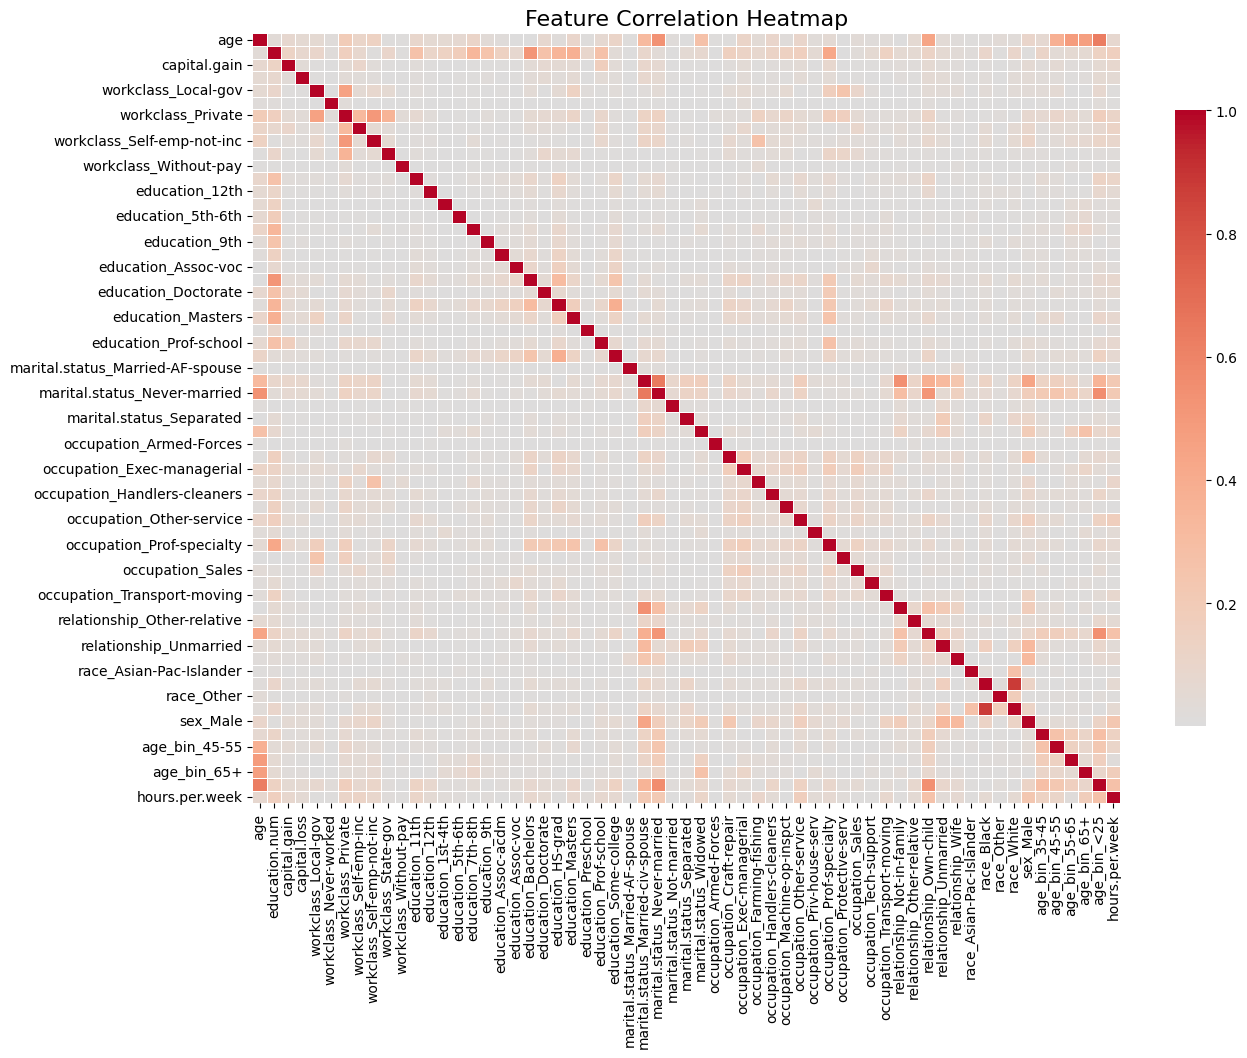

In [ ]:
# Correlation-Based Feature Reduction

#corr_matrix = X_scaled_standard.corr().abs()
corr_matrix = X_scaled_minmax.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()




In [ ]:
# Drop columns with correlation > 0.9

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

X_scaled_minmax.drop(columns=to_drop, inplace=True, errors='ignore')

print(f"Removed {len(to_drop)} highly correlated columns.")
print("To drop colums are",to_drop)

Removed 0 highly correlated columns.
To drop colums are []


In [ ]:
len(y_encoded)

29170

In [ ]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 8. Train-test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_standard, y_encoded, test_size=0.3, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (20419, 61) (20419,)
Test set shape: (8751, 61) (8751,)


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_val.shape

(4376, 61)

In [ ]:
y_test.shape

(4375,)

In [ ]:
X_train

,age,education.num,capital.gain,capital.loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25,hours.per.week
1522,-1.578152,-1.740954,4.471253,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,32.0
20476,0.170842,-1.323405,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
21291,0.389466,-2.576053,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,25.0
2182,0.608091,-0.488305,0.893928,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,2.201825,-0.317092,-0.194663,-0.497642,55.0
3496,-0.630780,-2.576053,0.235685,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,-0.317092,-0.194663,-0.497642,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.995154,1.181893,-0.147557,-0.218181,3.730025,-0.015493,-1.718929,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,40.0
5390,0.025093,-1.740954,-0.147557,-0.218181,3.730025,-0.015493,-1.718929,-0.187531,-0.293467,-0.208029,...,3.049613,-0.066648,-2.686860,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
860,1.555463,-0.488305,-0.147557,4.337192,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,3.153663,-0.194663,-0.497642,40.0
15795,-1.359528,-0.070756,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,18.0


In [ ]:
X.columns = X.columns.astype(str)

### 9. Random Forest model training

### 10 Performance evaluation and ROC



In [ ]:
# Project : Predict whether a person will be making more than $50k
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# The code below provides a solution to predict income bracket for making more than 50k using the adult.csv dataset,
# covering all necessary steps from data cleaning and preprocessing to model training and evaluation using Logistic Regression.
# Accurancy: The overall percentage of predictions the model got
# Fi-Score: providing a balanced measure of performance.
# AUC means evaluation.The model has a high ability to distinguish between the two income classes.


--- Logistic Regression Model Evaluation ---
Accuracy: 0.8082
F1-Score: 0.6885
AUC: 0.9084


# 11 Income Distribution – Target Variable Analysis


/tmp/ipython-input-4223323675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='Set2')


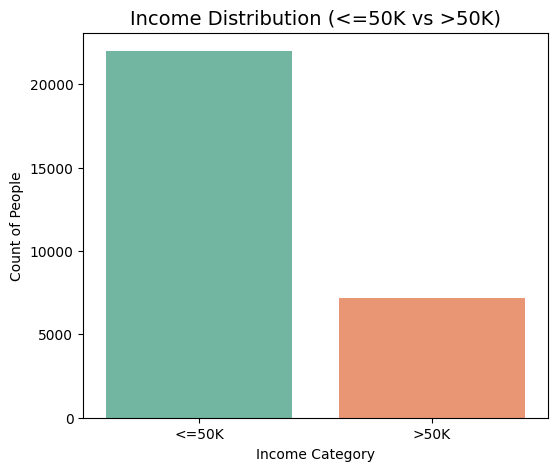

🔹 Income Distribution Summary:


,Count,Percentage
income,,
<=50K,21999,75.42
>50K,7171,24.58


In [ ]:
#Income Distribution – Target Variable Analysis

plt.figure(figsize=(6, 5))
sns.countplot(x='income', data=df, palette='Set2')

plt.title("Income Distribution (<=50K vs >50K)", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Count of People")
plt.show()

# Print numeric summary
income_counts = df['income'].value_counts()
income_percent = df['income'].value_counts(normalize=True) * 100

summary_df = pd.DataFrame({
    "Count": income_counts,
    "Percentage": income_percent.round(2)
})

print("🔹 Income Distribution Summary:")
display(summary_df)

### 12 predication whether a person will be making more than $50k.

/tmp/ipython-input-2547088603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


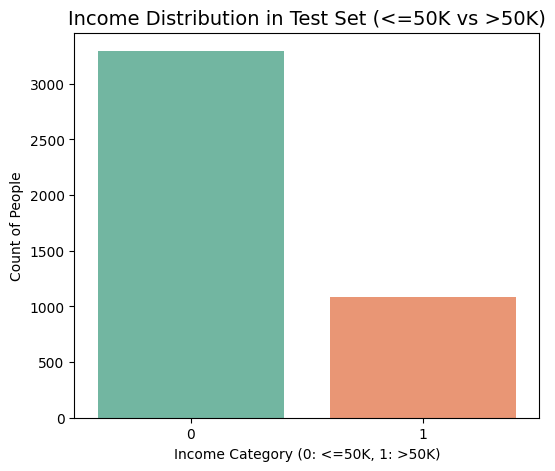

Income Distribution Summary (Test Set):


,Count,Percentage
0,3294,75.29
1,1081,24.71


In [ ]:
# Income Distribution – Target Variable Analysis on Test Data

plt.figure(figsize=(6, 5))
sns.countplot(x=y_test, palette='Set2')

plt.title("Income Distribution in Test Set (<=50K vs >50K)", fontsize=14)
plt.xlabel("Income Category (0: <=50K, 1: >50K)")
plt.ylabel("Count of People")
plt.show()

# Print numeric summary
income_counts_test = pd.Series(y_test).value_counts()
income_percent_test = pd.Series(y_test).value_counts(normalize=True) * 100

summary_df_test = pd.DataFrame({
    "Count": income_counts_test,
    "Percentage": income_percent_test.round(2)
})

print("Income Distribution Summary (Test Set):")
display(summary_df_test)

In [ ]:
private_high_income = df[(df['income'] == '>50K') & (df['workclass'] == 'Private')]
#these are the workclass that are private and earn more than 50K

In [ ]:
private_high_income

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
15,46,Private,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
16,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32522,46,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32535,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32539,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
X_train

,age,education.num,capital.gain,capital.loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25,hours.per.week
1522,-1.578152,-1.740954,4.471253,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,32.0
20476,0.170842,-1.323405,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
21291,0.389466,-2.576053,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,25.0
2182,0.608091,-0.488305,0.893928,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,2.201825,-0.317092,-0.194663,-0.497642,55.0
3496,-0.630780,-2.576053,0.235685,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,-0.317092,-0.194663,-0.497642,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.995154,1.181893,-0.147557,-0.218181,3.730025,-0.015493,-1.718929,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,40.0
5390,0.025093,-1.740954,-0.147557,-0.218181,3.730025,-0.015493,-1.718929,-0.187531,-0.293467,-0.208029,...,3.049613,-0.066648,-2.686860,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
860,1.555463,-0.488305,-0.147557,4.337192,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,3.153663,-0.194663,-0.497642,40.0
15795,-1.359528,-0.070756,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,18.0


In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X_test

,age,education.num,capital.gain,capital.loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Black,race_Other,race_White,sex_Male,age_bin_35-45,age_bin_45-55,age_bin_55-65,age_bin_65+,age_bin_<25,hours.per.week
24943,-0.630780,1.599443,-0.147557,-0.218181,-0.268095,-0.015493,-1.718929,-0.187531,-0.293467,4.807020,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,-0.497642,50.0
22924,-1.286653,-0.070756,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,20.0
10675,1.628337,-2.576053,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,3.153663,-0.194663,-0.497642,40.0
23588,-0.120657,-1.740954,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,40.0
17191,-1.359528,-0.070756,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,-1.418734,-0.570884,-0.454169,-0.317092,-0.194663,2.009477,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,0.899590,1.181893,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,2.201825,-0.317092,-0.194663,-0.497642,50.0
22757,-0.922279,-0.488305,-0.147557,-0.218181,-0.268095,-0.015493,0.581757,-0.187531,-0.293467,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,-0.317092,-0.194663,-0.497642,40.0
5679,1.701212,-0.905855,-0.147557,-0.218181,-0.268095,-0.015493,-1.718929,-0.187531,3.407540,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,-0.570884,-0.454169,3.153663,-0.194663,-0.497642,40.0
14658,-0.120657,-0.488305,-0.147557,-0.218181,-0.268095,-0.015493,-1.718929,-0.187531,3.407540,-0.208029,...,-0.327910,-0.066648,0.372182,0.704854,1.751668,-0.454169,-0.317092,-0.194663,-0.497642,50.0


In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:

# Project : Finals
# 1. Train several classification models on the cleaned dataset.
# 2. Evaluate them using key metrics:
#    - Accuracy
#    - Precision
#    - Recall
#    - F1 Score
#    - ROC–AUC (since our target is binary)
# 3. Compare which model performs best.




In [ ]:
def add(a,b):
  c = a+b
  return c

In [ ]:
print(add(3,5))

8


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test, X_val, y_val):
    """
    Trains a given model and prints evaluation metrics.
    """
    print(f"🔹 Training model: {model_name}")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # If model gives probabilities, use them for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None




    # Predictions
    y_pred = model.predict(X_val)

    # If model gives probabilities, use them for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val)[:, 1]
    else:
        y_prob = None

    # Compute metrics
    acc_val = accuracy_score(y_val, y_pred)
    prec_val = precision_score(y_val, y_pred)
    rec_val = recall_score(y_val, y_pred)
    f1_val = f1_score(y_val, y_pred)
    roc_val = roc_auc_score(y_val, y_prob) if y_prob is not None else None


    # Print metrics
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    if roc is not None:
        print(f"ROC–AUC:   {roc:.3f}")
    print("-" * 40)


    # Print metrics
    print(f"Accuracy_val:  {acc_val:.3f}")
    print(f"Precision_val: {prec_val:.3f}")
    print(f"Recall_val:    {rec_val:.3f}")
    print(f"F1 Score_val:  {f1_val:.3f}")
    if roc is not None:
        print(f"ROC–AUC:   {roc_val:.3f}")
    print("-" * 40)

    # Return results for comparison later
    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc,
        "Accuracy_val": acc_val,
        "Precision_val": prec_val,
        "Recall_val": rec_val,
        "F1_val": f1_val,
        "ROC-AUC_val": roc_val
    }


### Train and evaluate Logistic Regression

In [ ]:
### Logistic Regression
# A simple linear model often used for binary classification.
# It tries to find the best line (or surface) that separates the two classes.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_results = train_and_evaluate(log_model, "Logistic Regression", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: Logistic Regression
Accuracy:  0.849
Precision: 0.741
Recall:    0.599
F1 Score:  0.663
ROC–AUC:   0.908
----------------------------------------
Accuracy_val:  0.849
Precision_val: 0.726
Recall_val:    0.622
F1 Score_val:  0.670
ROC–AUC:   0.907
----------------------------------------


In [ ]:
log_results

### Train and evaluate Decision Tree

In [ ]:
### Decision Tree Classifier
# A non-linear model that splits data into branches based on feature conditions.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_results = train_and_evaluate(tree_model, "Decision Tree", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: Decision Tree
Accuracy:  0.809
Precision: 0.618
Recall:    0.593
F1 Score:  0.605
ROC–AUC:   0.766
----------------------------------------
Accuracy_val:  0.799
Precision_val: 0.593
Recall_val:    0.601
F1 Score_val:  0.597
ROC–AUC:   0.753
----------------------------------------


### Train and evaluate Random Forest

In [ ]:
### Random Forest Classifier
# An ensemble of multiple decision trees.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_results = train_and_evaluate(rf_model, "Random Forest", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: Random Forest
Accuracy:  0.839
Precision: 0.697
Recall:    0.614
F1 Score:  0.653
ROC–AUC:   0.890
----------------------------------------
Accuracy_val:  0.835
Precision_val: 0.676
Recall_val:    0.634
F1 Score_val:  0.654
ROC–AUC:   0.887
----------------------------------------


### Train and evaluate Gradient Boosting

In [ ]:
### Gradient Boosting Classifier
# Builds trees one by one, where each new tree corrects errors of previous ones.
# We’ll use the built-in `GradientBoostingClassifier` from scikit-learn.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_results = train_and_evaluate(gb_model, "Gradient Boosting", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: Gradient Boosting
Accuracy:  0.865
Precision: 0.806
Recall:    0.598
F1 Score:  0.687
ROC–AUC:   0.918
----------------------------------------
Accuracy_val:  0.864
Precision_val: 0.790
Recall_val:    0.612
F1 Score_val:  0.690
ROC–AUC:   0.918
----------------------------------------


### Train and evaluate K-Nearest Neighbors

In [ ]:
### K-Nearest Neighbors (KNN)
# Looks at the “K” closest data points and assigns the majority class.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_results = train_and_evaluate(knn_model, "K-Nearest Neighbors", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: K-Nearest Neighbors
Accuracy:  0.816
Precision: 0.638
Recall:    0.587
F1 Score:  0.612
ROC–AUC:   0.849
----------------------------------------
Accuracy_val:  0.813
Precision_val: 0.630
Recall_val:    0.586
F1 Score_val:  0.607
ROC–AUC:   0.848
----------------------------------------


### Train and evaluate Support Vector Classifier (SVC)

In [ ]:
### Support Vector Classifier
# Tries to find the best separating boundary (margin) between classes.


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(probability=True, random_state=42)
svc_results = train_and_evaluate(svc_model, "Support Vector Classifier", X_train, y_train, X_test, y_test, X_val, y_val)


🔹 Training model: Support Vector Classifier
Accuracy:  0.841
Precision: 0.752
Recall:    0.531
F1 Score:  0.623
ROC–AUC:   0.900
----------------------------------------
Accuracy_val:  0.838
Precision_val: 0.740
Recall_val:    0.534
F1 Score_val:  0.620
ROC–AUC:   0.899
----------------------------------------


### Combine all results for comparison

In [ ]:
### Compare all model results together


In [ ]:
import pandas as pd

all_results = pd.DataFrame([
    log_results,
    tree_results,
    rf_results,
    gb_results,
    knn_results,
    svc_results
])

# Sort by F1 score (since it balances precision and recall)
all_results = all_results.sort_values(by="F1", ascending=False).reset_index(drop=True)
all_results


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_val,Precision_val,Recall_val,F1_val,ROC-AUC_val
0,Gradient Boosting,0.865143,0.806492,0.597595,0.686504,0.918110,0.864031,0.789976,0.612396,0.689943,0.918456
1,Logistic Regression,0.849143,0.740571,0.599445,0.662577,0.908209,0.848720,0.726486,0.621647,0.669990,0.907180
2,Random Forest,0.838857,0.697479,0.614246,0.653222,0.889796,0.834552,0.676209,0.633673,0.654250,0.887262
3,Support Vector Classifier,0.840914,0.752294,0.530990,0.622560,0.900437,0.838437,0.739744,0.533765,0.620097,0.899116
4,K-Nearest Neighbors,0.815771,0.638191,0.587419,0.611753,0.849333,0.812614,0.629851,0.585569,0.606903,0.848367
5,Decision Tree,0.808686,0.617534,0.592969,0.605002,0.765510,0.799360,0.592525,0.601295,0.596878,0.752874


### Plot ROC Curves

In [ ]:
### ROC Curves
# Visualize how well each model separates the two classes.
# Higher curves (closer to top-left) mean better performance.


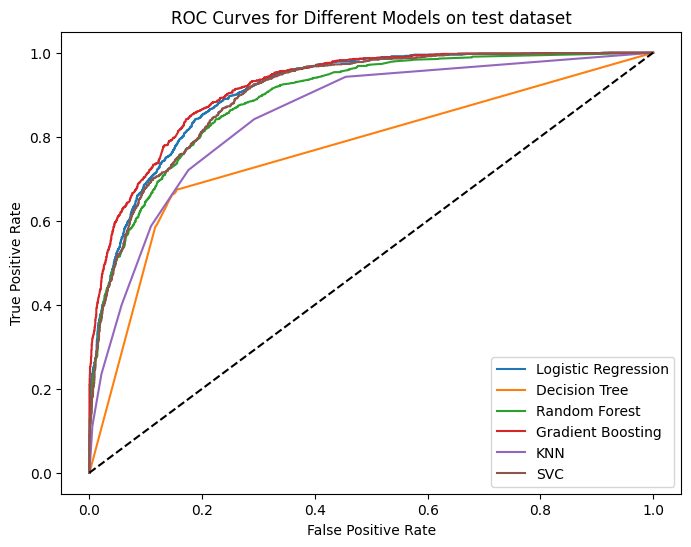

In [ ]:
plt.figure(figsize=(8,6))
models_list = [
    ("Logistic Regression", log_model),
    ("Decision Tree", tree_model),
    ("Random Forest", rf_model),
    ("Gradient Boosting", gb_model),
    ("KNN", knn_model),
    ("SVC", svc_model)
]

for name, mdl in models_list:
    if hasattr(mdl, "predict_proba"):
        y_prob = mdl.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=name)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models on test dataset")
plt.legend()
plt.show()


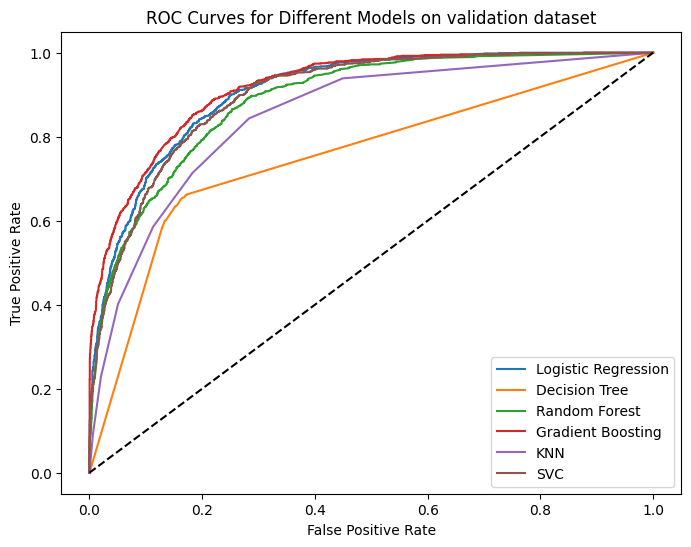

In [ ]:
plt.figure(figsize=(8,6))
models_list = [
    ("Logistic Regression", log_model),
    ("Decision Tree", tree_model),
    ("Random Forest", rf_model),
    ("Gradient Boosting", gb_model),
    ("KNN", knn_model),
    ("SVC", svc_model)
]

for name, mdl in models_list:
    if hasattr(mdl, "predict_proba"):
        y_prob = mdl.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        plt.plot(fpr, tpr, label=name)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models on validation dataset")
plt.legend()
plt.show()
